<a href="https://colab.research.google.com/github/wallik2/University-stuff/blob/main/Intro_Data_Sci/Projects/Classification_(Abalone).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: classification


<font color='coral'><font size="7">Abalone : </font>

<fieldset>

Dataset: Abalone DataSet ( https://archive.ics.uci.edu/ml/datasets/Abalone )
Design and write python code to create classification model to predict the Sex of Abalone


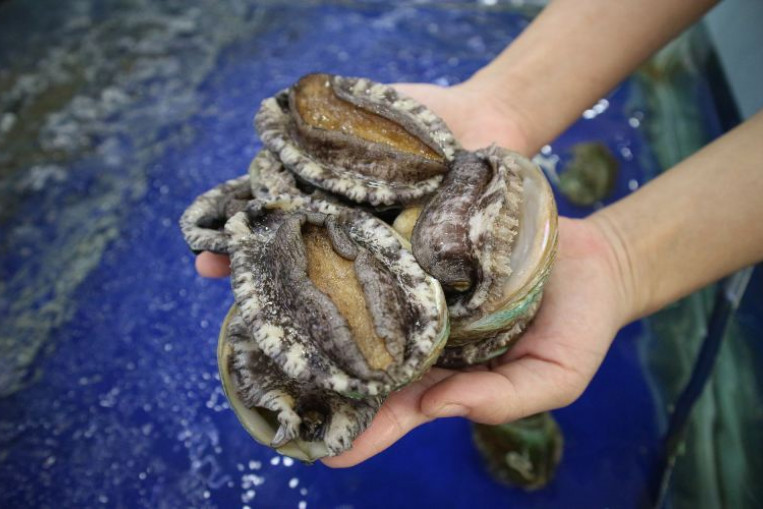

<fieldset>

**<u>Attribute Information:</u>**

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.



---



<b>Name / Data Type / Measurement Unit / Description</b>
- Sex / nominal / -- / M, F, and I (infant)
- Length / continuous / mm / Longest shell measurement
- Diameter / continuous / mm / perpendicular to length
- Height / continuous / mm / with meat in shell
- Whole weight / continuous / grams / whole abalone
- Shucked weight / continuous / grams / weight of meat
- Viscera weight / continuous / grams / gut weight (after bleeding)
- Shell weight / continuous / grams / after being dried
- Rings / integer / -- / +1.5 gives the age in years

</fieldset>

<fieldset>

**<u>Tasks required</u>**

1.1 What is the set of attributes used in the model? and Why? <br>
1.2 What is the classification algorithm used in the model. <br>
1.3 What is the accuracy score from your model? <br>
1.4 Send the python code to the home work system


##### 1. Collecting the data

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd, numpy as np ,matplotlib.pyplot as plt, seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/Data /abalone.data",header=None)

data.columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10




---



##### 2. Data Exploration


In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

> Each label counts are fairly equal.

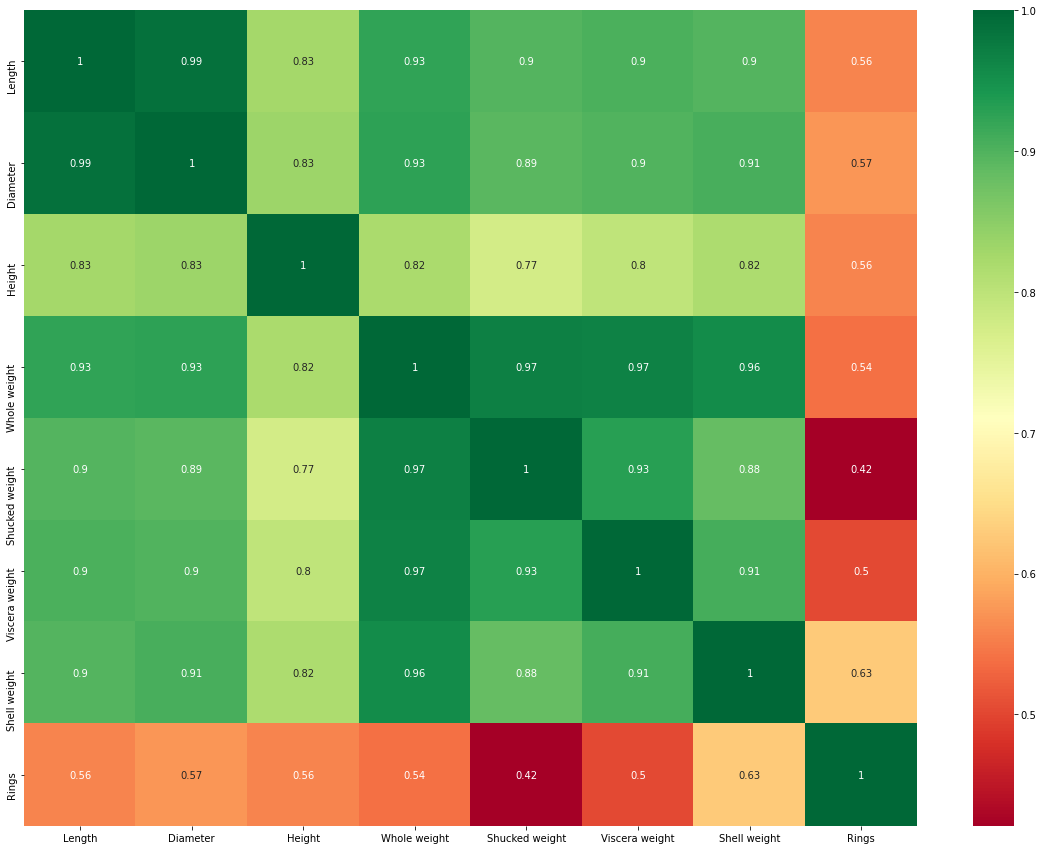

In [ ]:
corr_matrix = data.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,15))
#Plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

> Each feature seems to have a strong linear relationship except Rings

> We may suspect remove some features since some have high multicollinearity



---



In [ ]:
X = data.drop('Sex',axis=1)

y = data['Sex']

> Then we isolated X as features, while y is not a label

In [ ]:
from sklearn.feature_selection import mutual_info_classif

m1_score = mutual_info_classif(X,y)

m1_score = pd.DataFrame(data=m1_score,columns=['MI_score'],index=X.columns)


In [ ]:
m1_score.sort_values(by='MI_score',ascending=False)

,MI_score
Viscera weight,0.211489
Shell weight,0.204591
Whole weight,0.198414
Shucked weight,0.197187
Diameter,0.196836
Height,0.192943
Length,0.174388
Rings,0.150932


> Note that the previous correlation only determine the LINEAR relationship, but this one is a good indicator, since it is able to determine non-linear realtionship, however just only the label and each feature

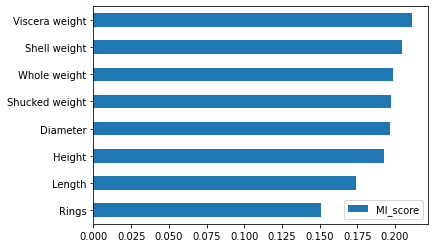

In [ ]:
m1_score.sort_values(by='MI_score',ascending=True).plot.barh()

> It said that Shell weight has the strongest relationship among others, and the least is Rings.



---



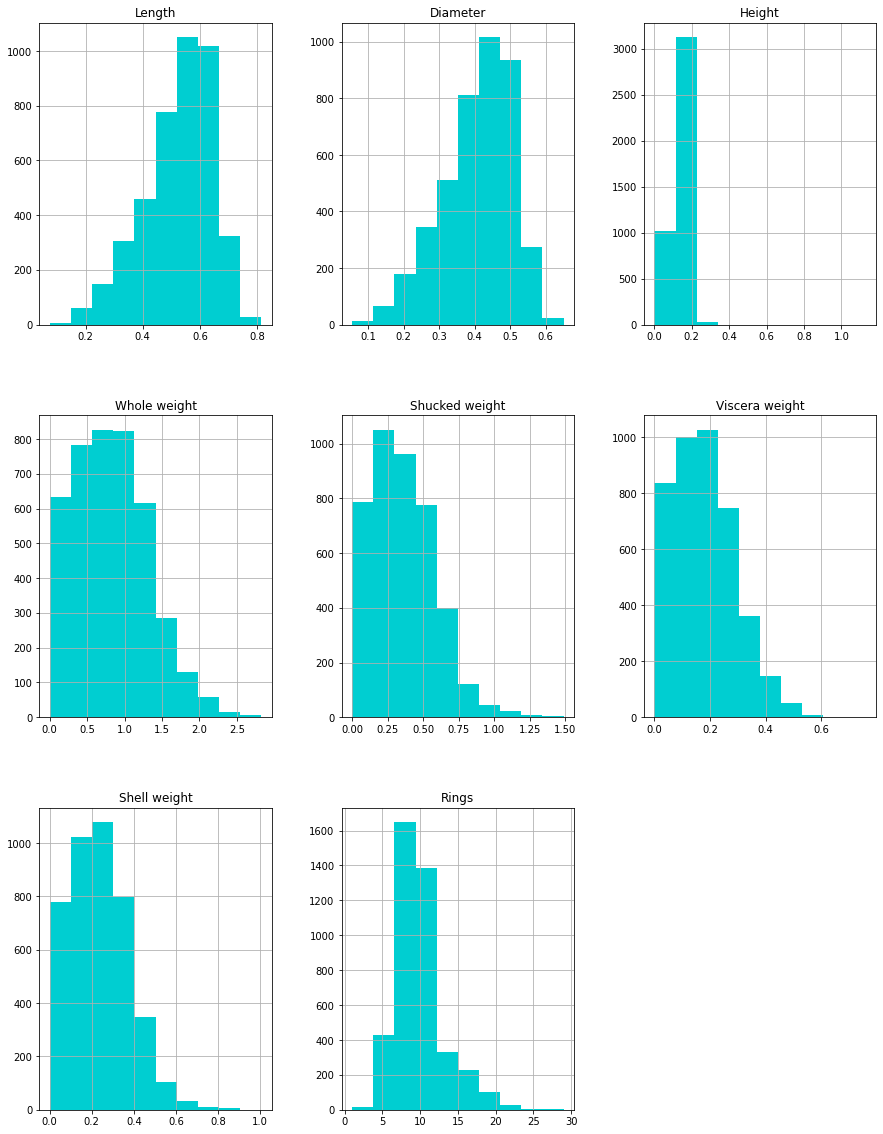

In [ ]:
data.hist(bins=10, figsize= (15,20), color='darkturquoise')

plt.show()

> The distribution of almost all columns are close to normal, so we suspect to norlalize the data using Standardization

##### 3. Data Preprocessing

###### A) Check the missing values & outliers

In [ ]:
#Checking missing values

if (len(data.columns) == data.isnull().sum(axis=0).value_counts()[0]):
  print('No missing value was found')

No missing value was found


In [ ]:
#data



---



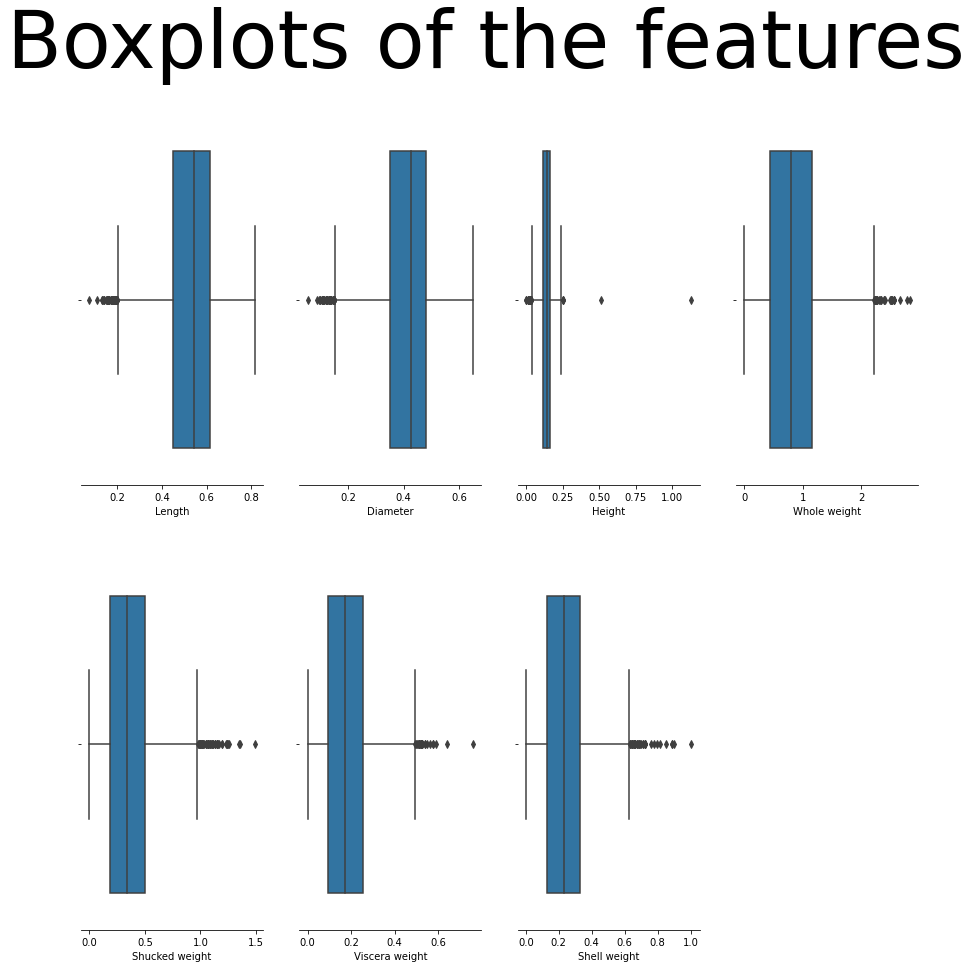

In [ ]:
from scipy import stats

fig, ax = plt.subplots(2,4,figsize=(15,15))

fig.suptitle('Boxplots of the features',fontsize=80)

sns.despine(left=True)

L = 1

for i in range(2):
  for k in range(4):
    sns.boxplot(ax=ax[i][k], x=data.iloc[:,L])
    L += 1
    if L == 8:
      fig.delaxes(ax[1][3])
      plt.show()
      break
    

> With our bare eyes, there are not too much outliers

In [ ]:
k = 0

for L in range(7):

  z = np.abs(stats.zscore(X.iloc[:,L]))
  print('The proportion of the value which are outliers in column {} is {:.3f} \n'.format(X.columns[L],np.count_nonzero(z > 3)/len(z)))
  k += 1

  if ((np.count_nonzero(z > 3)/len(z)) > 0.05) :
    print('The column {} contains the outlier more than 5% of overall data'.format(X.columns[L]))
    k = 0

if k == 7:
  print('########################################################################\n','All columns contain the outlier less than or equal to 5% of overall data \n', '########################################################################')

The proportion of the value which are outliers in column Length is 0.004 

The proportion of the value which are outliers in column Diameter is 0.003 

The proportion of the value which are outliers in column Height is 0.001 

The proportion of the value which are outliers in column Whole weight is 0.005 

The proportion of the value which are outliers in column Shucked weight is 0.009 

The proportion of the value which are outliers in column Viscera weight is 0.005 

The proportion of the value which are outliers in column Shell weight is 0.006 

########################################################################
 All columns contain the outlier less than or equal to 5% of overall data 
 ########################################################################


> We assume that the acceptable level of outliers is not reached 5% 

> Note: The outlier reachs z>=3

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

> Splitting the data into Training set & Test set

> We wil not allow to open X_test, y_test until we done selecting the model

In [ ]:
data_train = pd.concat([y_train, X_train], axis=1)

data_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4038,I,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,11
1272,I,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,8
3384,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7
3160,I,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035,7
3894,M,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215,12
...,...,...,...,...,...,...,...,...,...
3444,F,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9
466,F,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12
3092,M,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11
3772,M,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9


> However, There might have an extreme outlier which can reduce the performance of the model

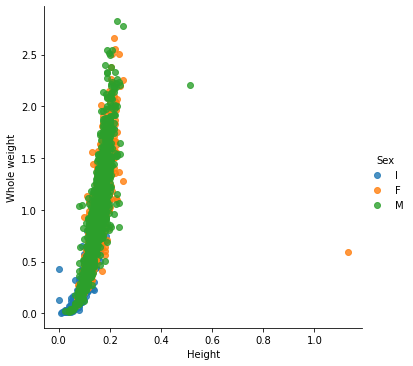

In [ ]:
sns.lmplot(x="Height", y="Whole weight", data=data_train, hue="Sex", fit_reg=False, legend=True)

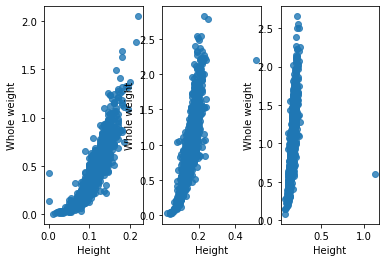

In [ ]:
f, axes = plt.subplots(1, 3)

sns.regplot(x="Height", y="Whole weight", data=data_train[data_train['Sex'] == 'I'], fit_reg=False,ax=axes[0])
sns.regplot(x="Height", y="Whole weight", data=data_train[data_train['Sex'] == 'M'], fit_reg=False,ax=axes[1])
sns.regplot(x="Height", y="Whole weight", data=data_train[data_train['Sex'] == 'F'], fit_reg=False,ax=axes[2])

plt.show()

> There is an extremely outlier of Sex = F, so we better remove it 

> Similarly, Sex = M, there is an extreme outlier which have height > 0.4

In [ ]:
max = data_train[data_train['Sex'] == 'F'].max()['Height']

data_train.drop(data_train[data_train['Height'] == max].index,axis=0,inplace = True)

In [ ]:
max = data_train[data_train['Sex'] == 'M'].max()['Height']

data_train.drop(data_train[data_train['Height'] == max].index,axis=0,inplace = True)

In [ ]:
data_train.drop(data_train[data_train['Height'] > 1].index,axis=0,inplace = True)

In [ ]:
data_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4038,I,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,11
1272,I,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,8
3384,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7
3160,I,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035,7
3894,M,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215,12
...,...,...,...,...,...,...,...,...,...
3444,F,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9
466,F,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12
3092,M,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11
3772,M,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9


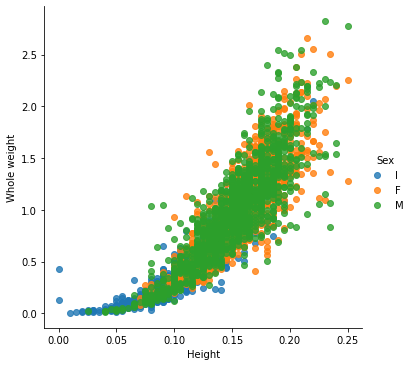

In [ ]:
sns.lmplot(x="Height", y="Whole weight", data=data_train, hue="Sex", fit_reg=False, legend=True)

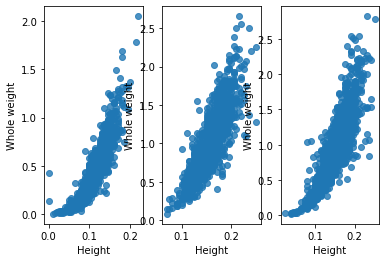

In [ ]:
f, axes = plt.subplots(1, 3)

sns.regplot(x="Height", y="Whole weight", data=data_train[data_train['Sex'] == 'I'], fit_reg=False,ax=axes[0])
sns.regplot(x="Height", y="Whole weight", data=data_train[data_train['Sex'] == 'F'], fit_reg=False,ax=axes[1])
sns.regplot(x="Height", y="Whole weight", data=data_train[data_train['Sex'] == 'M'], fit_reg=False,ax=axes[2])

plt.show()

In [ ]:
# !!!! Seem like we can create a new feature like Whole_weight > 2.0 & Height > 0.2, so it can make the model better define which is F

In [ ]:
# We will do a violin plot for each feature for each sex, so we can see try to search for the rule-based like the above

> The scatterplot seems have a better improvement



---



> Splitting the data into Training set & Test set

> We wil not allow to open X_test, y_test until we done selecting the model

###### B) Feature Transformation



---



In [ ]:
X = data_train.drop(['Sex'],axis=1)
y = data_train['Sex']

###### C) Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X_tr = pd.DataFrame(SS.fit_transform(X))

X_tr.columns = X.columns

X_tr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.210471,0.370083,-0.374847,-0.322763,-0.324892,-0.404844,-0.211852,0.328841
1,-0.419207,-0.542139,-1.026459,-0.665899,-0.479826,-0.821030,-0.712315,-0.606424
2,-1.846478,-1.859794,-1.808393,-1.388824,-1.355540,-1.346978,-1.391516,-0.918179
3,-2.098350,-2.113189,-1.938715,-1.453990,-1.364522,-1.534490,-1.463011,-0.918179
4,-0.251293,-0.288744,-0.114203,-0.409311,-0.437163,-0.349963,-0.176104,0.640596
...,...,...,...,...,...,...,...,...
3334,-0.293272,-0.086028,-0.635492,-0.532514,-0.468599,-0.441432,-0.676568,-0.294669
3335,1.217956,1.434342,1.319343,1.140398,0.818027,1.122693,1.146549,0.640596
3336,-0.125357,-0.136707,-0.374847,-0.509095,-0.522489,-0.432285,-0.369140,0.328841
3337,0.420364,0.572799,-0.505170,0.454127,0.699020,0.345204,-0.033115,-0.294669


###### D) Dimensional Reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_tr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.210471,0.370083,-0.374847,-0.322763,-0.324892,-0.404844,-0.211852,0.328841
1,-0.419207,-0.542139,-1.026459,-0.665899,-0.479826,-0.821030,-0.712315,-0.606424
2,-1.846478,-1.859794,-1.808393,-1.388824,-1.355540,-1.346978,-1.391516,-0.918179
3,-2.098350,-2.113189,-1.938715,-1.453990,-1.364522,-1.534490,-1.463011,-0.918179
4,-0.251293,-0.288744,-0.114203,-0.409311,-0.437163,-0.349963,-0.176104,0.640596
...,...,...,...,...,...,...,...,...
3334,-0.293272,-0.086028,-0.635492,-0.532514,-0.468599,-0.441432,-0.676568,-0.294669
3335,1.217956,1.434342,1.319343,1.140398,0.818027,1.122693,1.146549,0.640596
3336,-0.125357,-0.136707,-0.374847,-0.509095,-0.522489,-0.432285,-0.369140,0.328841
3337,0.420364,0.572799,-0.505170,0.454127,0.699020,0.345204,-0.033115,-0.294669


In [ ]:
pca = PCA(n_components=7)

X_tr_2 = pd.DataFrame(pca.fit_transform(X_tr))
X_tr_2

,0,1,2,3,4,5,6
0,-0.305082,0.443187,-0.452822,0.560454,0.164537,-0.003064,-0.112230
1,-1.855221,-0.237063,-0.055382,0.449193,0.132141,0.141483,0.075939
2,-4.255169,0.000907,0.625469,0.021220,0.007507,-0.018539,0.005733
3,-4.611496,0.062093,0.808394,-0.042664,0.013091,0.126085,0.010869
4,-0.590770,0.850781,-0.026399,-0.024612,-0.026749,0.006186,0.043557
...,...,...,...,...,...,...,...
3334,-1.218245,-0.037113,-0.255614,0.388352,-0.079206,-0.072348,-0.162652
3335,3.164099,-0.005993,-0.366691,-0.104563,0.099756,-0.194078,-0.147078
3336,-0.825767,0.572210,-0.236385,0.258549,0.013870,-0.063489,0.012655
3337,0.651130,-0.694651,0.163113,0.828297,-0.078423,0.105535,-0.146848




--- 

<br>



### 4. Model Training

> As I mentioned before that I selected these 5 models to perform which including 

<fieldset>

*Model 1*: Logistic Regression <br>
*Model 2*: Support Vector Classifier (kernel = rbf, linear, poly) <br>
*Model 3*: K-nearest neighbor <br>
*Model 4*: Random forest classifier <br>
*Model 5*: Gaussian Naive bayes

In [ ]:
# Must do K-Fold Cross Validation first

from sklearn.model_selection import cross_val_predict


# This is the criteria I picked for judging the performance of the model
def perf_score(score):
  
  score *= 100

  if score == 100:
    return("Perfect or overfitting?")

  elif score >= 98:            #Ideal score!
    return("Flawless")

  elif score >= 95:
    return("Outstanding")
  
  elif score >= 90:
    return("Excellent")
  
  elif score >= 85:
    return("Great")
  
  elif score >= 80:
    return("Good")
  
  elif score >= 70:
    return("Fair")

  else:
    return("Not acceptable")



---



#### A) Logistic Regression

In [ ]:
X = X_tr_2.copy()

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

In [ ]:
Logistic_R = LogisticRegression(random_state=0)

Evaluation (f1 score)


In [ ]:
y_pred = cross_val_predict(Logistic_R, X, y, cv=10)

y_pred

array(['I', 'I', 'I', ..., 'I', 'M', 'M'], dtype=object)

In [ ]:
from sklearn.metrics import f1_score

accuracy_LG = f1_score(y.to_numpy(), y_pred,average='weighted')

print('The F1 score of Logistic Regresion is ',accuracy_LG)

print("\nThe performance is {}".format(perf_score(accuracy_LG)))

The F1 score of Logistic Regresion is  0.5371182602155873

The performance is Not acceptable




---



#### B) Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

##### B1) kernel = rbf

In [ ]:
svm_clf = SVC(kernel='rbf')

In [ ]:
y_pred = cross_val_predict(svm_clf, X, y, cv=10)

y_pred

array(['I', 'I', 'I', ..., 'I', 'M', 'M'], dtype=object)

In [ ]:
accuracy_rbf = f1_score(y.to_numpy(), y_pred, average='weighted')

print('The f1 score of Support vector machine classifier is ',accuracy_rbf)

print("\nThe performance is {}".format(perf_score(accuracy_rbf)))

The f1 score of Support vector machine classifier is  0.5342903321872632

The performance is Not acceptable


##### B2) kernel = linear

In [ ]:
svm_clf = SVC(kernel='linear')

In [ ]:
y_pred = cross_val_predict(svm_clf, X, y, cv=10)

In [ ]:
y_pred

array(['I', 'I', 'I', ..., 'I', 'M', 'M'], dtype=object)

In [ ]:
accuracy_linear = f1_score(y.to_numpy(), y_pred ,average='weighted')

print('The f1 score of Support vector machine classifier is ',accuracy_linear)

print("\nThe performance is {}".format(perf_score(accuracy_linear)))

The f1 score of Support vector machine classifier is  0.5248891114134547

The performance is Not acceptable


##### B3) kernel = poly (degree3)

In [ ]:
svm_clf = SVC(kernel='poly',degree=3)

In [ ]:
y_pred = cross_val_predict(svm_clf, X, y, cv=10)

y_pred

array(['M', 'I', 'I', ..., 'M', 'M', 'M'], dtype=object)

In [ ]:
accuracy_deg3 = f1_score(y.to_numpy(), y_pred ,average='weighted')

print('The f1 score of Support vector machine classifier is ',accuracy_deg3)

print("\nThe performance is {}".format(perf_score(accuracy_deg3)))

The f1 score of Support vector machine classifier is  0.44011524262522234

The performance is Not acceptable




---



#### C) K-nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
K_Nearest = KNeighborsClassifier(n_neighbors=100)

y_pred = cross_val_predict(K_Nearest, X, y, cv=10)

In [ ]:
accuracy_K = f1_score(y.to_numpy(), y_pred, average='weighted')

print('The F1 score of K-Nearest Neightbor is ',accuracy_K)

print("\nThe performance is {}".format(perf_score(accuracy_K)))

The F1 score of K-Nearest Neightbor is  0.5330045745304829

The performance is Not acceptable




---



#### D. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_clf= RandomForestClassifier(random_state=42)

y_pred = cross_val_predict(forest_clf, X, y, cv=10)

y_pred

array(['I', 'I', 'I', ..., 'F', 'M', 'M'], dtype=object)

In [ ]:
accuracy_random = f1_score(y.to_numpy(), y_pred,average='weighted')

print('The F1 score of Random forest classifier is ',accuracy_random)

print("\nThe performance is {}".format(perf_score(accuracy_random)))

The F1 score of Random forest classifier is  0.5408665854131323

The performance is Not acceptable




---



#### E. XGBoost classifier

In [ ]:
from xgboost import XGBClassifier

XGB = XGBClassifier()

In [ ]:
y_pred = cross_val_predict(XGB, X, y, cv=10)

y_pred

array(['F', 'I', 'I', ..., 'F', 'M', 'M'], dtype=object)

In [ ]:
accuracy_XG = f1_score(y.to_numpy(), y_pred,average='weighted')

print('The F1 score of XGBoost is ',accuracy_XG)

print("\nThe performance is {}".format(perf_score(accuracy_XG)))

The F1 score of XGBoost is  0.5416611896485816

The performance is Not acceptable




---



#### F. Gaussian Naive bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GB_clf = GaussianNB()

y_pred = cross_val_predict(GB_clf, X, y, cv=10)

In [ ]:
accuracy_naive = f1_score(y.to_numpy(), y_pred, average='weighted')

print('The F1 score of Gaussian Naive bayes Classifier is ',accuracy_naive)

print("\nThe performance is {}".format(perf_score(accuracy_naive)))

The F1 score of Gaussian Naive bayes Classifier is  0.5118288343876287

The performance is Not acceptable




---



- Since, XGBoost is  0.5416611896485816 did the best, so we choose XGBoost

- Next, we will do PCA 

In [ ]:
XGB.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### Announcement the Best model !

In [ ]:
"""

acc_all = {'Logistic Reg':accuracy_LG,'SVC rbf':accuracy_rbf,'SVC linear':accuracy_linear,'SVC deg3':accuracy_deg3,
           'K-nearest ':accuracy_K,'Random forest':accuracy_random,'XGB':accuracy_XG,'Naive':accuracy_naive}

best_model = max(acc_all,key=acc_all.get)
best_score = max(acc_all.values())

print(best_model,':', best_score )

"""

"\n\nacc_all = {'Logistic Reg':accuracy_LG,'SVC rbf':accuracy_rbf,'SVC linear':accuracy_linear,'SVC deg3':accuracy_deg3,\n           'K-nearest ':accuracy_K,'Random forest':accuracy_random,'XGB':accuracy_XG,'Naive':accuracy_naive}\n\nbest_model = max(acc_all,key=acc_all.get)\nbest_score = max(acc_all.values())\n\nprint(best_model,':', best_score )\n\n"

> XGB did the best, however this is not a good score, there are two ways to improve the performance of XGB <br>

<fieldset>

1. Feature Engineering
2. Fine Tuning



---



### 5. Deploy the model

> Now test with the test set

- start with standardization of the test set

In [ ]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X_tr_test = pd.DataFrame(SS.fit_transform(X_test))

X_tr_test.columns = X_test.columns

X_tr_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.685942,0.489895,0.554111,0.583186,0.305104,1.104922,0.657817,-0.270488
1,0.564740,0.341935,0.297328,0.107385,0.148878,0.320615,0.070276,-0.574424
2,0.322336,0.391255,1.452852,0.330867,-0.227903,0.406752,0.731259,1.857062
3,0.928346,0.835134,0.810894,0.908625,0.845003,0.787572,1.061751,-0.270488
4,-0.364476,-0.200583,0.168936,-0.417849,-0.549545,-0.649569,-0.150052,1.249191
...,...,...,...,...,...,...,...,...
831,-0.000870,0.243296,0.297328,-0.190248,-0.241688,-0.200746,-0.003167,0.337383
832,0.605140,0.292616,0.297328,0.164028,0.289022,-0.087407,0.217161,-0.574424
833,0.201133,0.243296,0.297328,-0.161411,-0.009646,-0.196212,-0.201462,0.033447
834,-0.445277,-0.496503,-0.473022,-0.494060,-0.457648,-0.799177,-0.377724,-0.574424


- PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_tr_test

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.685942,0.489895,0.554111,0.583186,0.305104,1.104922,0.657817,-0.270488
1,0.564740,0.341935,0.297328,0.107385,0.148878,0.320615,0.070276,-0.574424
2,0.322336,0.391255,1.452852,0.330867,-0.227903,0.406752,0.731259,1.857062
3,0.928346,0.835134,0.810894,0.908625,0.845003,0.787572,1.061751,-0.270488
4,-0.364476,-0.200583,0.168936,-0.417849,-0.549545,-0.649569,-0.150052,1.249191
...,...,...,...,...,...,...,...,...
831,-0.000870,0.243296,0.297328,-0.190248,-0.241688,-0.200746,-0.003167,0.337383
832,0.605140,0.292616,0.297328,0.164028,0.289022,-0.087407,0.217161,-0.574424
833,0.201133,0.243296,0.297328,-0.161411,-0.009646,-0.196212,-0.201462,0.033447
834,-0.445277,-0.496503,-0.473022,-0.494060,-0.457648,-0.799177,-0.377724,-0.574424


In [ ]:
X_tr_2_test = pd.DataFrame(pca.transform(X_tr_test))
X_tr_2_test

,0,1,2,3,4,5,6
0,1.543898,-0.610248,0.004653,-0.165572,0.022273,-0.613946,0.127845
1,0.541280,-0.675924,-0.431598,0.005685,-0.008499,-0.195055,0.143180
2,1.692135,1.761243,-0.254194,-0.777394,-0.104506,-0.174368,0.001844
3,2.202570,-0.755819,-0.093511,-0.149865,0.342308,-0.035722,0.070458
4,-0.495653,1.523147,-0.158709,-0.176220,-0.017657,0.233545,-0.079979
...,...,...,...,...,...,...,...
831,0.044724,0.452774,-0.380274,-0.129730,0.040922,0.016596,-0.157870
832,0.514417,-0.648703,-0.457395,0.001354,0.241653,0.183420,0.220744
833,0.069454,0.074598,-0.496292,-0.020342,-0.116884,0.147104,-0.030557
834,-1.437735,-0.185780,-0.125104,-0.048471,0.260859,0.206643,0.045368


> Predict with XGBClassifier

In [ ]:
y_pred = XGB.predict(X_tr_2_test)

y_pred

array(['F', 'M', 'F', 'M', 'M', 'I', 'I', 'I', 'I', 'M', 'M', 'I', 'M',
       'M', 'I', 'M', 'F', 'F', 'F', 'I', 'M', 'M', 'M', 'F', 'M', 'I',
       'I', 'I', 'M', 'M', 'F', 'F', 'I', 'F', 'I', 'M', 'I', 'I', 'I',
       'I', 'M', 'F', 'F', 'I', 'M', 'M', 'M', 'I', 'M', 'I', 'I', 'M',
       'I', 'I', 'I', 'M', 'M', 'F', 'I', 'M', 'M', 'F', 'F', 'I', 'I',
       'M', 'I', 'I', 'I', 'I', 'F', 'M', 'M', 'I', 'M', 'M', 'F', 'M',
       'M', 'I', 'M', 'F', 'F', 'I', 'I', 'M', 'M', 'F', 'M', 'M', 'F',
       'I', 'M', 'M', 'M', 'I', 'I', 'F', 'M', 'I', 'F', 'M', 'F', 'M',
       'M', 'I', 'F', 'I', 'M', 'M', 'F', 'I', 'M', 'M', 'M', 'I', 'I',
       'I', 'M', 'F', 'M', 'M', 'M', 'I', 'F', 'M', 'F', 'F', 'F', 'F',
       'M', 'I', 'M', 'I', 'M', 'I', 'F', 'F', 'I', 'M', 'I', 'M', 'M',
       'I', 'M', 'M', 'I', 'M', 'I', 'M', 'M', 'F', 'M', 'F', 'M', 'M',
       'F', 'I', 'I', 'I', 'F', 'I', 'F', 'F', 'I', 'F', 'F', 'F', 'F',
       'I', 'M', 'M', 'F', 'I', 'I', 'F', 'I', 'I', 'M', 'M', 'F

In [ ]:
accuracy_XG = f1_score(y_test.to_numpy(), y_pred,average='weighted')

print('The F1 score of XGBoost is ',accuracy_XG)

print("\nThe performance is {}".format(perf_score(accuracy_XG)))

The F1 score of XGBoost is  0.5450904808766813

The performance is Not acceptable




---



---



---

